In [1]:
import pickle
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
savepath = r"Z:\Shared363\data\Coppola-Simone\0_DATA\openframe\240904 testing recall surface"

with open(join(savepath, "locked_profile_x.pickle"), 'rb') as f:
    locked_profile_x = pickle.load(f)
    
with open(join(savepath, "locked_profile_y.pickle"), 'rb') as f:
    locked_profile_y = pickle.load(f)
    
with open(join(savepath, "all_profiles_x.pickle"), 'rb') as f:
        all_profiles_x = pickle.load(f)
        
with open(join(savepath, "all_profiles_y.pickle"), 'rb') as f:
        all_profiles_y = pickle.load(f)

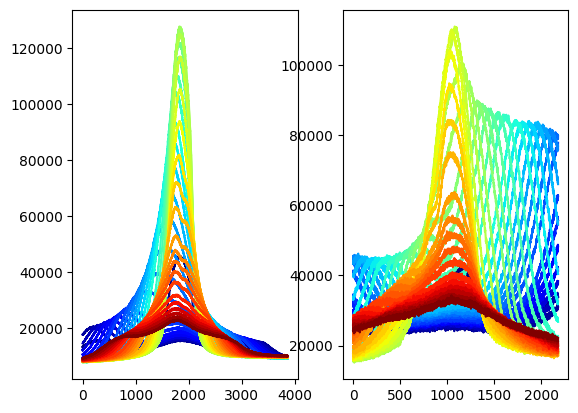

In [3]:
fig, ax = plt.subplots(1, 2)
# set cmap
cmap = plt.get_cmap('jet', len(all_profiles_x))
for i in range(len(all_profiles_x)):
    ax[0].plot(all_profiles_x[i], color=cmap(i))
    ax[1].plot(all_profiles_y[i], color=cmap(i))
plt.show()

In [4]:
differences_x = all_profiles_x - locked_profile_x
differences_y = all_profiles_y - locked_profile_y

In [5]:
mean_distance_squared_x = np.mean(np.power(differences_x, 2), axis=1)
mean_distance_squared_y = np.mean(np.power(differences_y, 2), axis=1)

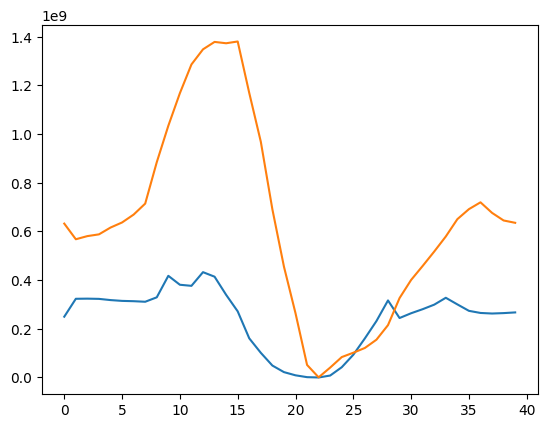

In [6]:
plt.plot(mean_distance_squared_x)
plt.plot(mean_distance_squared_y)

In [7]:
# also plot the sum
sum_of_differences = mean_distance_squared_x + mean_distance_squared_y
# find the index of the minimum
min_index = np.argmin(sum_of_differences)
print(min_index)

# find the index of the maximum
max_index = np.argmax(sum_of_differences)
print(max_index)

22
13


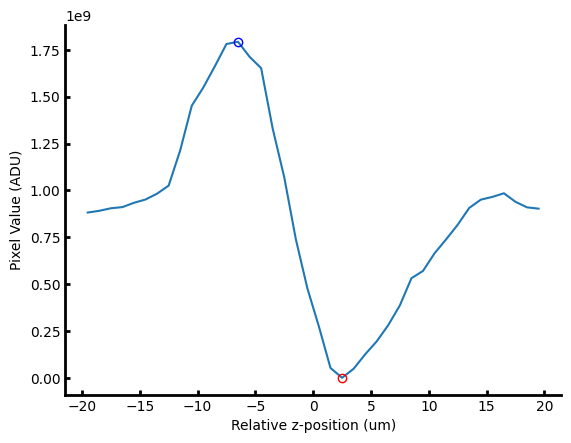

In [8]:
# Example figure of the profile difference at a random point
def plot_sum_of_differences(data, savepath=None):
    # make an array of the same length as the data
    x = np.arange(len(data))
    x = (x - np.mean(x)) * 1
    
    # get min and max index
    min_index = np.argmin(data)
    max_index = np.argmax(data)
    
    fig, ax = plt.subplots()
    ax.plot(x, data)
    # highlight the min and max with unfilled circles
    ax.plot(x[min_index], data[min_index], 'ro', fillstyle='none')
    ax.plot(x[max_index], data[max_index], 'bo', fillstyle='none')
    
    ax.set_xlabel("Relative z-position (um)")
    ax.set_ylabel("Pixel Value (ADU)")
    
    # remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # make spines thicker
    spine_width = 2
    ax.spines['left'].set_linewidth(spine_width)
    ax.spines['bottom'].set_linewidth(spine_width)
    
    # make ticks thicker
    ax.xaxis.set_tick_params(width=spine_width)
    ax.yaxis.set_tick_params(width=spine_width)
    
    # ticks should be towards inside
    ax.tick_params(direction='in')
        
    # y-axis should be in scientific notation
    ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
    
    if savepath is not None:
        plt.savefig(savepath, format='svg')
    
    plt.show()
    
    
plot_savedir=r"C:\Users\u1870329\OneDrive - University of Warwick\simone-work\2_Presentations\240828 data presentation\figures\plots"
# plt.savefig(join(plot_savedir, "sum_of_differences.svg"))
plot_sum_of_differences(sum_of_differences, join(plot_savedir, "sum_of_differences.svg"))

In [9]:
# Example figure of the profile difference at a random point
def plot_profiles(i, savepath=None):
    fig, ax = plt.subplots()
    ax.plot(locked_profile_x)
    ax.plot(all_profiles_x[i], '--')
    
    ax.set_xlabel("x-position (px)")
    ax.set_ylabel("Pixel Value (ADU)")
    
    # remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # make spines thicker
    spine_width = 2
    ax.spines['left'].set_linewidth(spine_width)
    ax.spines['bottom'].set_linewidth(spine_width)
    
    # make ticks thicker
    ax.xaxis.set_tick_params(width=spine_width)
    ax.yaxis.set_tick_params(width=spine_width)
    
    # ticks should be towards inside
    ax.tick_params(direction='in')
    
    # set ticks at specific positions
    ax.set_xticks([0, 1000, 2000, 3000, 4000])
    
    # y-axis should be in scientific notation
    ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
    
    if savepath is not None:
        plt.savefig(savepath, format='svg')
    
    plt.show()
    
    

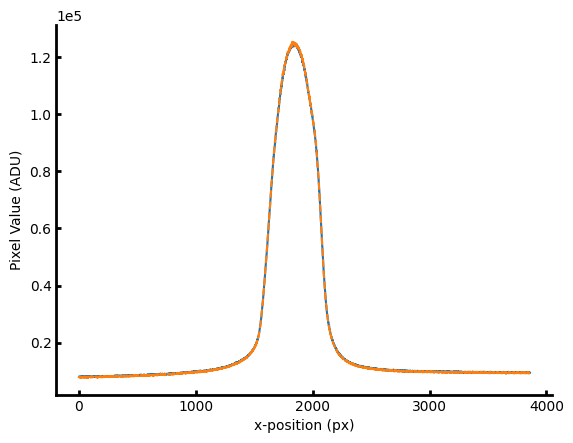

In [10]:
savepath = r"C:\Users\u1870329\OneDrive - University of Warwick\simone-work\2_Presentations\240828 data presentation\figures\plots"
plot_profiles(min_index, join(savepath, "min_index.svg"))

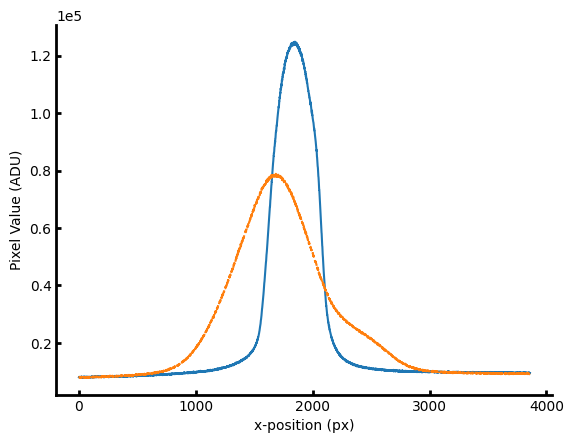

In [11]:
plot_profiles(max_index, join(savepath, "max_index.svg"))